In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Download the Shampoo Sales dataset
# Assuming the dataset is in a CSV file named 'shampoo_sales.csv'
shampoo_data = pd.read_csv('shampoo_sales.csv')
shampoo_data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


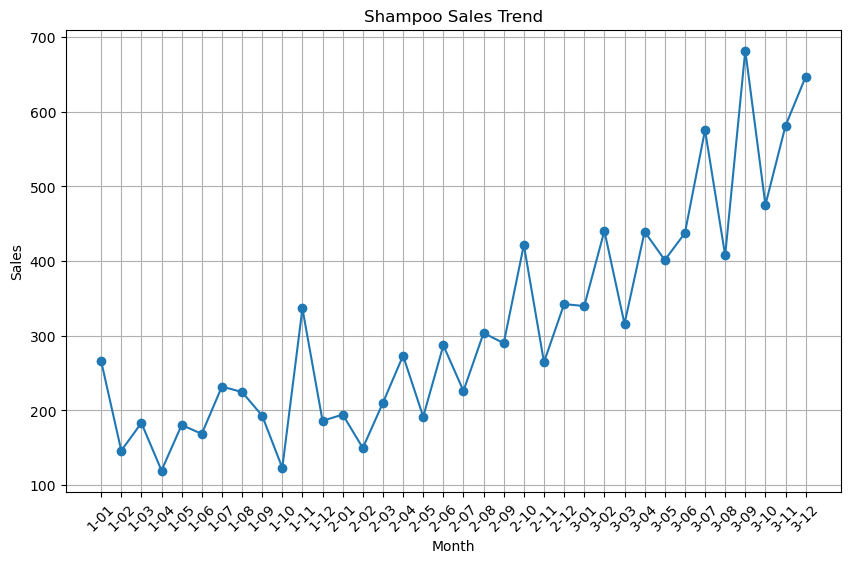

In [3]:
# Step 2: Exploratory Data Analysis (EDA)
# Data Cleaning (assuming no missing values in this example)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(shampoo_data['Month'], shampoo_data['Sales'], marker='o')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Shampoo Sales Trend')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [4]:
# Calculate summary statistics
summary_stats = shampoo_data['Sales'].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
 count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64


In [5]:
shampoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [6]:
# Outlier detection (example using IQR method)
Q1 = shampoo_data['Sales'].quantile(0.25)
Q3 = shampoo_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
shampoo_data_out = shampoo_data[(shampoo_data['Sales'] <= lower_bound) & (shampoo_data['Sales'] >= upper_bound)]
shampoo_data_out

,Month,Sales


In [7]:
# Correlation analysis
correlation = shampoo_data.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
        Sales
Sales    1.0


C:\Users\To Learn\AppData\Local\Temp\ipykernel_15396\175110267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = shampoo_data.corr()


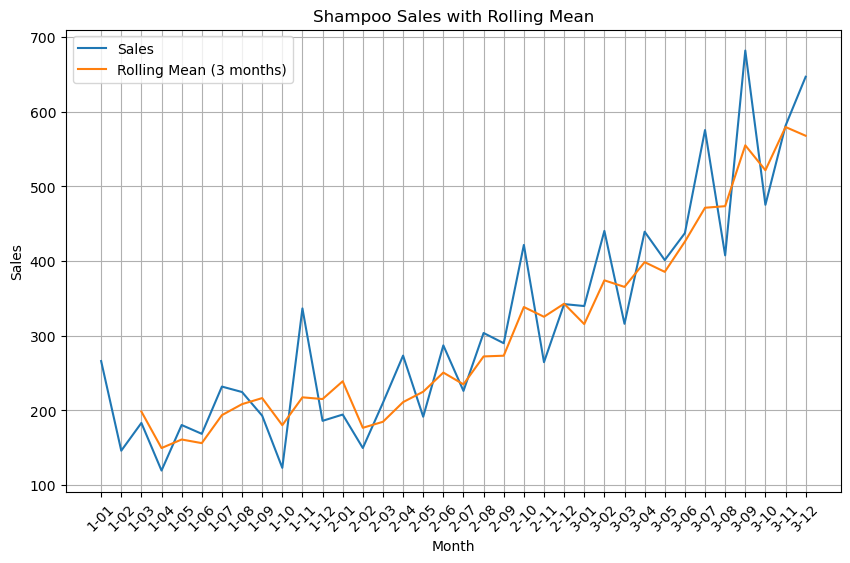

In [8]:
# Calculate rolling mean with a window size of 3 months
shampoo_data['rolling_mean'] = shampoo_data['Sales'].rolling(window=3).mean()

# Plot the original sales data and the rolling mean
plt.figure(figsize=(10, 6))
plt.plot(shampoo_data['Month'], shampoo_data['Sales'], label='Sales')
plt.plot(shampoo_data['Month'], shampoo_data['rolling_mean'], label='Rolling Mean (3 months)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Shampoo Sales with Rolling Mean')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(True)
plt.show()

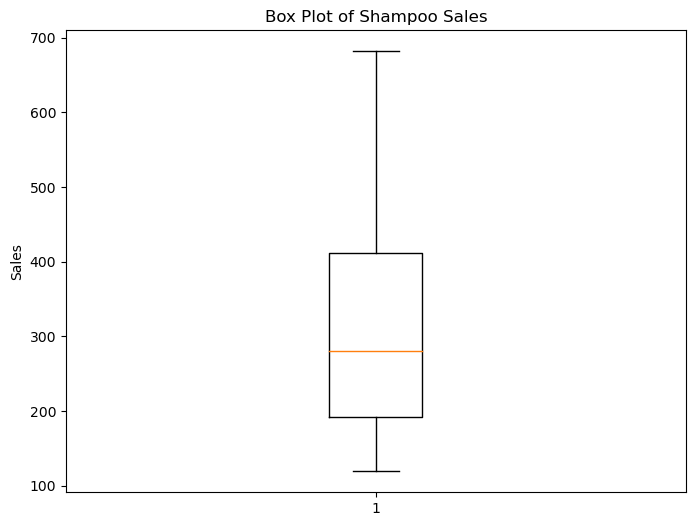

In [9]:
plt.figure(figsize=(8, 6))
plt.boxplot(shampoo_data['Sales'])
plt.title('Box Plot of Shampoo Sales')
plt.ylabel('Sales')
plt.show()

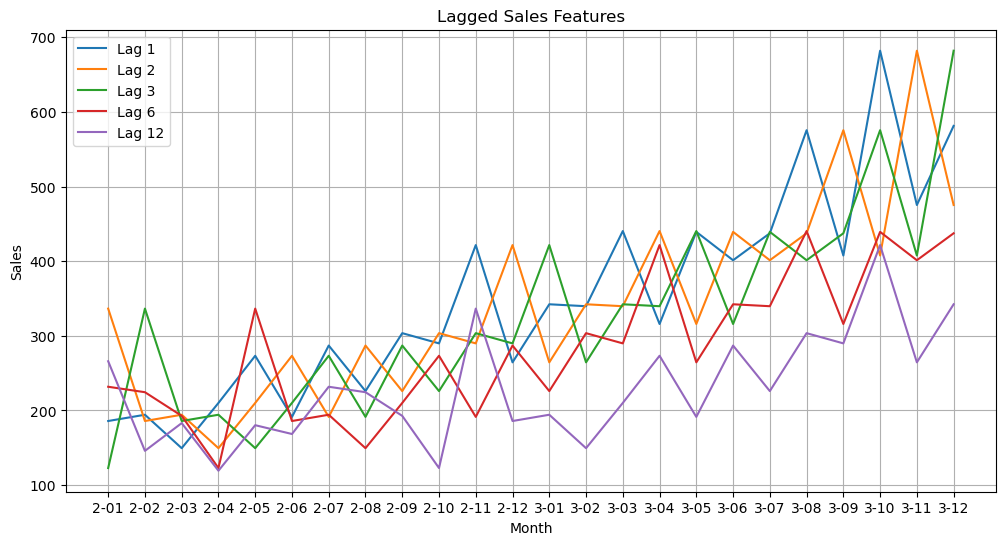

In [10]:
# Create lagged features
for lag in [1, 2, 3, 6, 12]:
    shampoo_data[f'lag_{lag}'] = shampoo_data['Sales'].shift(lag)

# Drop rows with missing values due to lag creation
shampoo_data.dropna(inplace=True)

# Visualize the lagged features
plt.figure(figsize=(12, 6))
for lag in [1, 2, 3, 6, 12]:
    plt.plot(shampoo_data['Month'], shampoo_data[f'lag_{lag}'], label=f'Lag {lag}')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Lagged Sales Features')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Step 3: Date and Lag-based Features
# Convert 'Month' column to datetime format
shampoo_data['Month'] = pd.to_datetime(shampoo_data['Month'], format='%m-%d')
shampoo_data

,Month,Sales,rolling_mean,lag_1,lag_2,lag_3,lag_6,lag_12
12,1900-02-01,194.3,238.900000,185.9,336.5,122.9,231.8,266.0
13,1900-02-02,149.5,176.566667,194.3,185.9,336.5,224.5,145.9
14,1900-02-03,210.1,184.633333,149.5,194.3,185.9,192.8,183.1
15,1900-02-04,273.3,210.966667,210.1,149.5,194.3,122.9,119.3
16,1900-02-05,191.4,224.933333,273.3,210.1,149.5,336.5,180.3
17,1900-02-06,287.0,250.566667,191.4,273.3,210.1,185.9,168.5
18,1900-02-07,226.0,234.800000,287.0,191.4,273.3,194.3,231.8
19,1900-02-08,303.6,272.200000,226.0,287.0,191.4,149.5,224.5
20,1900-02-09,289.9,273.166667,303.6,226.0,287.0,210.1,192.8
21,1900-02-10,421.6,338.366667,289.9,303.6,226.0,273.3,122.9


In [12]:
# Create lag features
shampoo_data['sales_lag1'] = shampoo_data['Sales'].shift(1)
shampoo_data['sales_lag2'] = shampoo_data['Sales'].shift(2)
shampoo_data

,Month,Sales,rolling_mean,lag_1,lag_2,lag_3,lag_6,lag_12,sales_lag1,sales_lag2
12,1900-02-01,194.3,238.900000,185.9,336.5,122.9,231.8,266.0,NaN,NaN
13,1900-02-02,149.5,176.566667,194.3,185.9,336.5,224.5,145.9,194.3,NaN
14,1900-02-03,210.1,184.633333,149.5,194.3,185.9,192.8,183.1,149.5,194.3
15,1900-02-04,273.3,210.966667,210.1,149.5,194.3,122.9,119.3,210.1,149.5
16,1900-02-05,191.4,224.933333,273.3,210.1,149.5,336.5,180.3,273.3,210.1
17,1900-02-06,287.0,250.566667,191.4,273.3,210.1,185.9,168.5,191.4,273.3
18,1900-02-07,226.0,234.800000,287.0,191.4,273.3,194.3,231.8,287.0,191.4
19,1900-02-08,303.6,272.200000,226.0,287.0,191.4,149.5,224.5,226.0,287.0
20,1900-02-09,289.9,273.166667,303.6,226.0,287.0,210.1,192.8,303.6,226.0
21,1900-02-10,421.6,338.366667,289.9,303.6,226.0,273.3,122.9,289.9,303.6


In [13]:
# Calculate difference between consecutive sales values
shampoo_data['sales_diff1'] = shampoo_data['Sales'] - shampoo_data['sales_lag1']
shampoo_data['sales_diff2'] = shampoo_data['Sales'] - shampoo_data['sales_lag2']
shampoo_data

,Month,Sales,rolling_mean,lag_1,lag_2,lag_3,lag_6,lag_12,sales_lag1,sales_lag2,sales_diff1,sales_diff2
12,1900-02-01,194.3,238.900000,185.9,336.5,122.9,231.8,266.0,NaN,NaN,NaN,NaN
13,1900-02-02,149.5,176.566667,194.3,185.9,336.5,224.5,145.9,194.3,NaN,-44.8,NaN
14,1900-02-03,210.1,184.633333,149.5,194.3,185.9,192.8,183.1,149.5,194.3,60.6,15.8
15,1900-02-04,273.3,210.966667,210.1,149.5,194.3,122.9,119.3,210.1,149.5,63.2,123.8
16,1900-02-05,191.4,224.933333,273.3,210.1,149.5,336.5,180.3,273.3,210.1,-81.9,-18.7
17,1900-02-06,287.0,250.566667,191.4,273.3,210.1,185.9,168.5,191.4,273.3,95.6,13.7
18,1900-02-07,226.0,234.800000,287.0,191.4,273.3,194.3,231.8,287.0,191.4,-61.0,34.6
19,1900-02-08,303.6,272.200000,226.0,287.0,191.4,149.5,224.5,226.0,287.0,77.6,16.6
20,1900-02-09,289.9,273.166667,303.6,226.0,287.0,210.1,192.8,303.6,226.0,-13.7,63.9
21,1900-02-10,421.6,338.366667,289.9,303.6,226.0,273.3,122.9,289.9,303.6,131.7,118.0


In [14]:
# Extract features from datetime column
shampoo_data['year'] = shampoo_data['Month'].dt.year
shampoo_data['month'] = shampoo_data['Month'].dt.month
shampoo_data['day_of_week'] = shampoo_data['Month'].dt.dayofweek
shampoo_data

,Month,Sales,rolling_mean,lag_1,lag_2,lag_3,lag_6,lag_12,sales_lag1,sales_lag2,sales_diff1,sales_diff2,year,month,day_of_week
12,1900-02-01,194.3,238.900000,185.9,336.5,122.9,231.8,266.0,NaN,NaN,NaN,NaN,1900,2,3
13,1900-02-02,149.5,176.566667,194.3,185.9,336.5,224.5,145.9,194.3,NaN,-44.8,NaN,1900,2,4
14,1900-02-03,210.1,184.633333,149.5,194.3,185.9,192.8,183.1,149.5,194.3,60.6,15.8,1900,2,5
15,1900-02-04,273.3,210.966667,210.1,149.5,194.3,122.9,119.3,210.1,149.5,63.2,123.8,1900,2,6
16,1900-02-05,191.4,224.933333,273.3,210.1,149.5,336.5,180.3,273.3,210.1,-81.9,-18.7,1900,2,0
17,1900-02-06,287.0,250.566667,191.4,273.3,210.1,185.9,168.5,191.4,273.3,95.6,13.7,1900,2,1
18,1900-02-07,226.0,234.800000,287.0,191.4,273.3,194.3,231.8,287.0,191.4,-61.0,34.6,1900,2,2
19,1900-02-08,303.6,272.200000,226.0,287.0,191.4,149.5,224.5,226.0,287.0,77.6,16.6,1900,2,3
20,1900-02-09,289.9,273.166667,303.6,226.0,287.0,210.1,192.8,303.6,226.0,-13.7,63.9,1900,2,4
21,1900-02-10,421.6,338.366667,289.9,303.6,226.0,273.3,122.9,289.9,303.6,131.7,118.0,1900,2,5


In [15]:
# Step 4: Sliding and Expanding Window Features
# Create a sliding window feature
window_size = 3  # Number of months in the sliding window
shampoo_data['sales_sliding_window'] = shampoo_data['Sales'].rolling(window=window_size).mean()
shampoo_data

,Month,Sales,rolling_mean,lag_1,lag_2,lag_3,lag_6,lag_12,sales_lag1,sales_lag2,sales_diff1,sales_diff2,year,month,day_of_week,sales_sliding_window
12,1900-02-01,194.3,238.900000,185.9,336.5,122.9,231.8,266.0,NaN,NaN,NaN,NaN,1900,2,3,NaN
13,1900-02-02,149.5,176.566667,194.3,185.9,336.5,224.5,145.9,194.3,NaN,-44.8,NaN,1900,2,4,NaN
14,1900-02-03,210.1,184.633333,149.5,194.3,185.9,192.8,183.1,149.5,194.3,60.6,15.8,1900,2,5,184.633333
15,1900-02-04,273.3,210.966667,210.1,149.5,194.3,122.9,119.3,210.1,149.5,63.2,123.8,1900,2,6,210.966667
16,1900-02-05,191.4,224.933333,273.3,210.1,149.5,336.5,180.3,273.3,210.1,-81.9,-18.7,1900,2,0,224.933333
17,1900-02-06,287.0,250.566667,191.4,273.3,210.1,185.9,168.5,191.4,273.3,95.6,13.7,1900,2,1,250.566667
18,1900-02-07,226.0,234.800000,287.0,191.4,273.3,194.3,231.8,287.0,191.4,-61.0,34.6,1900,2,2,234.800000
19,1900-02-08,303.6,272.200000,226.0,287.0,191.4,149.5,224.5,226.0,287.0,77.6,16.6,1900,2,3,272.200000
20,1900-02-09,289.9,273.166667,303.6,226.0,287.0,210.1,192.8,303.6,226.0,-13.7,63.9,1900,2,4,273.166667
21,1900-02-10,421.6,338.366667,289.9,303.6,226.0,273.3,122.9,289.9,303.6,131.7,118.0,1900,2,5,338.366667


In [16]:
# Generate an expanding window feature
shampoo_data['sales_expanding_window'] = shampoo_data['Sales'].expanding().mean()
shampoo_data

,Month,Sales,rolling_mean,lag_1,lag_2,lag_3,lag_6,lag_12,sales_lag1,sales_lag2,sales_diff1,sales_diff2,year,month,day_of_week,sales_sliding_window,sales_expanding_window
12,1900-02-01,194.3,238.900000,185.9,336.5,122.9,231.8,266.0,NaN,NaN,NaN,NaN,1900,2,3,NaN,194.300000
13,1900-02-02,149.5,176.566667,194.3,185.9,336.5,224.5,145.9,194.3,NaN,-44.8,NaN,1900,2,4,NaN,171.900000
14,1900-02-03,210.1,184.633333,149.5,194.3,185.9,192.8,183.1,149.5,194.3,60.6,15.8,1900,2,5,184.633333,184.633333
15,1900-02-04,273.3,210.966667,210.1,149.5,194.3,122.9,119.3,210.1,149.5,63.2,123.8,1900,2,6,210.966667,206.800000
16,1900-02-05,191.4,224.933333,273.3,210.1,149.5,336.5,180.3,273.3,210.1,-81.9,-18.7,1900,2,0,224.933333,203.720000
17,1900-02-06,287.0,250.566667,191.4,273.3,210.1,185.9,168.5,191.4,273.3,95.6,13.7,1900,2,1,250.566667,217.600000
18,1900-02-07,226.0,234.800000,287.0,191.4,273.3,194.3,231.8,287.0,191.4,-61.0,34.6,1900,2,2,234.800000,218.800000
19,1900-02-08,303.6,272.200000,226.0,287.0,191.4,149.5,224.5,226.0,287.0,77.6,16.6,1900,2,3,272.200000,229.400000
20,1900-02-09,289.9,273.166667,303.6,226.0,287.0,210.1,192.8,303.6,226.0,-13.7,63.9,1900,2,4,273.166667,236.122222
21,1900-02-10,421.6,338.366667,289.9,303.6,226.0,273.3,122.9,289.9,303.6,131.7,118.0,1900,2,5,338.366667,254.670000


In [17]:
# Step 5: Feature Engineering for Forecasting and Prediction (using 'bill_charge' dataset)
# Assuming the 'bill_charge' dataset is in a CSV file named 'bill_charge.csv'
bill_charge_data = pd.read_csv('bill charge.csv')
bill_charge_data

,Date,Patient Name,Age,Bill Charge
0,1/1/2023,Bob,33,100.5
1,1/4/2023,Bob,24,250.0
2,1/7/2023,Bob,56,75.0
3,1/7/2023,Eve,40,300.0
4,1/9/2023,Charlie,40,150.5
5,1/10/2023,Charlie,24,200.0
6,1/11/2023,Bob,40,175.0
7,1/11/2023,Eve,40,400.0
8,1/11/2023,Bob,40,120.0
9,1/12/2023,Charlie,42,180.0


In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv("bill charge.csv")

# Feature Engineering
# Extract year, month, and day from the "Date" column
data["Year"] = pd.to_datetime(data["Date"]).dt.year
data["Month"] = pd.to_datetime(data["Date"]).dt.month
data["Day"] = pd.to_datetime(data["Date"]).dt.day

# Calculate the average bill charge for each patient
data["Avg_Bill_Charge"] = data.groupby("Patient Name")["Bill Charge"].transform("mean")

# Create a binary feature for returning customers
data["Returning_Customer"] = data.groupby("Patient Name")["Patient Name"].transform("count") > 1

# Encode categorical variables
categorical_features = ["Patient Name"]
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoded_data = one_hot_encoder.fit_transform(data[categorical_features])
encoded_columns = one_hot_encoder.get_feature_names_out(categorical_features)
data_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)

# Merge encoded data with the original dataset
data = pd.concat([data, data_encoded], axis=1)

# Drop original categorical columns
data.drop(columns=categorical_features, inplace=True)

# Feature Scaling
numerical_features = ["Age", "Bill Charge", "Avg_Bill_Charge"]
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Final Feature Set
features_to_use = [
    "Year",
    "Month",
    "Day",
    "Age",
    "Bill Charge",
    "Avg_Bill_Charge",
    "Returning_Customer",
] + list(encoded_columns)

# Select the final feature set
final_data = data[features_to_use]

# Save the processed data
final_data.to_csv("processed_bill_charge_data.csv", index=False)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
processed_bill_charge_data = pd.read_csv('processed_bill_charge_data.csv')
processed_bill_charge_data

,Year,Month,Day,Age,Bill Charge,Avg_Bill_Charge,Returning_Customer,Patient Name_Alice,Patient Name_Bob,Patient Name_Charlie,Patient Name_Diana,Patient Name_Eve
0,2023,1,1,-0.304679,-0.490825,-0.407879,True,0.0,1.0,0.0,0.0,0.0
1,2023,1,4,-1.234207,0.953631,-0.407879,True,0.0,1.0,0.0,0.0,0.0
2,2023,1,7,2.070783,-0.737204,-0.407879,True,0.0,1.0,0.0,0.0,0.0
3,2023,1,7,0.418288,1.436726,1.777677,True,0.0,0.0,0.0,0.0,1.0
4,2023,1,9,0.418288,-0.007730,0.061148,True,0.0,0.0,1.0,0.0,0.0
5,2023,1,10,-1.234207,0.470535,0.061148,True,0.0,0.0,1.0,0.0,0.0
6,2023,1,11,0.418288,0.228987,-0.407879,True,0.0,1.0,0.0,0.0,0.0
7,2023,1,11,0.418288,2.402917,1.777677,True,0.0,0.0,0.0,0.0,1.0
8,2023,1,11,0.418288,-0.302418,-0.407879,True,0.0,1.0,0.0,0.0,0.0
9,2023,1,12,0.624850,0.277297,0.061148,True,0.0,0.0,1.0,0.0,0.0
